# General Instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

* Do NOT import any other modules
* Do NOT change the prototypes of any of the functions
* Sample test cases are already given, test your code using these sample cases
* Grading will be based on hidden test cases
* Please solve this notebook using Google Colab as the required packages are already installed

Make sure you fill in any place that says `YOUR CODE STARTS HERE` or "YOUR ANSWER HERE", as well as your name and ID number below:

In [ ]:
NAME = ""
ID = ""

# **Loading the relavant libraries**

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assignment 2: Part 1
The end goal of this part is to code the operation happening in this GIF.

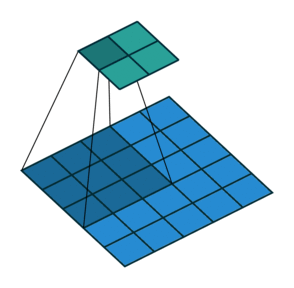

# **Convolutional Neural Network**
CNN is a hot pick for image classification and recognition.
Convolutional Neural Network has gained a lot of attention in recent years. It gives amazing results while working with images.

CNNs work on images in a manner similar to the human brain: by finding smaller details - a line, a rectangle, a blob; and then working their way up to more abstract features -> such as ines arranged in a manner form an oval shape and a certain form of oval with some features is a face.

The basic idea behind them is the mathematical function **Convolution**.


<a href="https://ibb.co/DbYkmHT"><img src="https://miro.medium.com/max/1200/1*pPYFYOZ-8dja-kRrkmuGOQ.jpeg" alt="Screenshot-2022-02-07-at-7-38-50-PM" border="0"></a>

So basically, all you need to know is that "images" are represented as multi-dimensional vectors. A 2-D layout makes sense, but there are more dimensions (which is unintuitive) present to mark the intensity of colours in the image (Remember the cool RGB pallete in MS-Paint?)


Well here is another one, for you to refresh your memory.

<img src="https://miro.medium.com/max/712/1*kBuGwp9V-vIRIhFK0oxWrA.png" alt="Screenshot-2022-02-07-at-7-38-50-PM" border="0"></a>

Now some of you might think that it's still OKAY to get an intuition about the above image. Well, how about this?


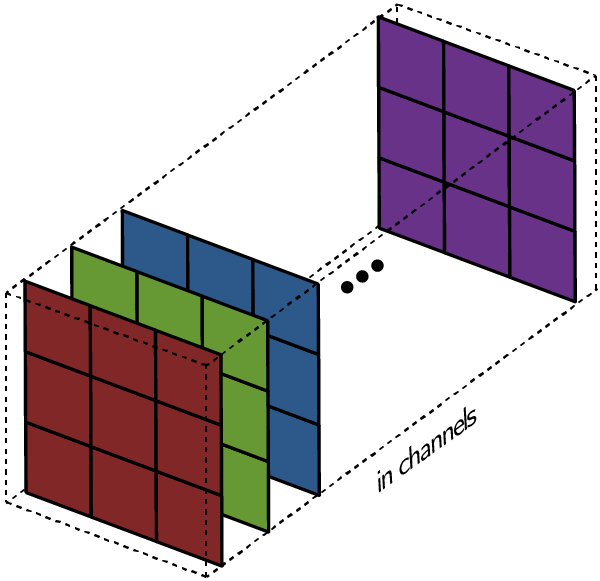

Image matrix is of three dimension (depth, height, width). Convolution is a set of Dot products performed by a filter (A mathematical filter like your regular snapchat filter, transforms the data into cooler,more desirable forms).

So we take our image which is a huge matrix, convolve it with a filter - a much smaller matrix, and get an activation map.

***Now what the heck is this Activation Map? Should we need to go into so much of depth?***

<img src="https://miro.medium.com/max/1200/1*3Dz_zOKDqrjrwINcgBlX9A.jpeg" alt="Screenshot-2022-02-07-at-7-38-50-PM" width=40% border="0"></a>

Well, not much but just the bit to get your attention. 

*Activation map*: Each filter is sensitive to certain data, it gets excited when it sees a certain shape/color/form. These are represented as activation maps of the orignal images. These are then fed through an activation function then to another bunch of filters which then get ‘excited’ by further more abstract features.

# ***`Now Why CNN?`***

Well, that's an interesting question. 

The neural network takes too much time to train, but don't worry CNN is there for our aid! 

The neurons of every layer are not fully connected so that means less complications, less number of weights and faster training.

Another exciting thing is that each layer almost finds a certain set of features in the previous layer. So a trained network can be used for **‘transfer learning’**.

# **CNN from Scratch**


<a href="https://ibb.co/DbYkmHT"><img src="https://cs231n.github.io/assets/cnn/cnn.jpeg" alt="Screenshot-2022-02-07-at-7-38-50-PM" border="0"></a>

A ConvNet arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a ConvNet transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels).


# **Let's understand by an example**

**Convolution Example**: Below is an example of a CONV layer. Since 3D volumes are hard to visualize, all the volumes (the input volume (in blue), the weight volume (in red), the output volume (in green)) are visualized with each depth slice stacked in rows. The input volume is of size W1=5,H1=5,C1=3, and the CONV layer parameters are K (#kernels) = 2, F (filter size) = 3, S (stride) = 2, P (padding) = 1. That is, we have two filters of size 3×3, and they are applied with a stride of 2. Therefore, the output volume size has spatial size (5 - 3 + 2)/2 + 1 = 3. Moreover, notice that a padding of P=1 is applied to the input volume, making the outer border of the input volume zero. The visualization below iterates over the output activations (green), and shows that each element is computed by elementwise multiplying the highlighted input (blue) with the filter (red), summing it up, and then offsetting the result by the bias.

<a href="https://ibb.co/q7YFYYb"><img src="https://i.ibb.co/CmKsKKx/conv.jpg" alt="conv" border="0"></a>

**Note**: In our assignment we would be using Pytorch framework, hence the order of the dimensions of the input and other parameters will differ from the above diagram. 
In the above diagram input dimension is (H,W,C_in) but in pytorch input dimension will be (C_in, H, W).

In this part, you will build every step of the convolution layer. You will first implement two helper functions: one for zero padding and the other for computing the convolution function itself.

# **Zero Padding** (EVALUATIVE)

The padding is a technique to fill values around the image. Usually, zero is filled around the image, and it is specifically called zero-padding. The following figure represents the padding technique.

<img src="
https://www.renom.jp/notebooks/tutorial/basic_algorithm/convolutional_neural_network/zero_padding.png" alt="Screenshot-2022-02-07-at-7-38-50-PM" width=20% border="0"></a>


*Why Padding is useful?*
 
* 
It allows you to use a CONV layer without necessarily shrinking  the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. 

*   It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.



Use t**orch.nn.ZeroPad2d** to add padding to all the images of a batch of examples X with zeros. 





In [ ]:
def zero_pad(X, pad):
    """
    Pad all the images of the dataset X with zeros. The padding is applied to 
    the height and width of an image, as illustrated in above figure.
    
    Argument:
    X -- python numpy array of shape (m, n_C, n_H, n_W) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_C, n_H + 2 * pad, n_W + 2 * pad)
    """
    
    # YOUR CODE STARTS HERE
    X_pad = 
    # YOUR CODE ENDS HERE
    
    return X_pad

In [ ]:
x = torch.zeros(1,3,5,5) #(m, n_C, n_H, n_W)
x = torch.tensor([[[[0,0,1,1,2],[2,0,1,1,0],[2,1,1,0,2],[0,0,2,0,2],[0,2,0,2,2]],
                [[1,1,2,2,0],[0,1,1,1,1],[1,2,1,1,1],[1,1,0,0,2],[2,2,1,2,0]],
                [[1,0,1,1,1],[1,1,0,2,0],[2,0,2,0,2],[1,1,2,1,0],[1,1,2,2,0]]]])
print("Before padding, x.shape =", x.shape)
x_pad = zero_pad(x, 1)
print ("After padding, x.shape =", x_pad.shape)
print()
print(x_pad)

**Remark:** By the above method of zero_pad you would have added rows and colums having zero entries in the top, left, right and bottom of the input matrix.

# **Single step Convolution** (EVALUATIVE)

In this part, implement a single step of convolution, in which you apply the filter to a single position of the input. This will be used to build a convolutional unit. 

*   Takes an input volume
*   Applies a filter at every position of the input
*   Outputs another volume (usually of different size)








### This function will simply implement a single step of this GIF.

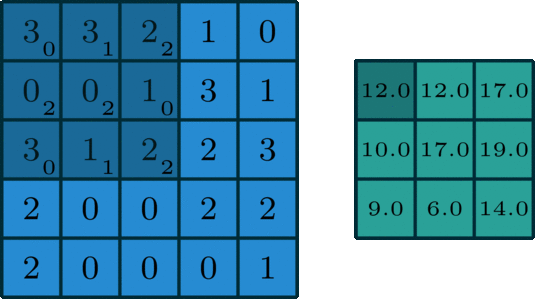

In [ ]:
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """

    ### START CODE HERE ###
    # Element-wise product between a_slice_prev and W. Do not add the bias yet.
    s = 
    # Sum over all entries of the volume s.
    Z = 
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = 
    ### END CODE HERE ###

    return Z

In [ ]:
# sample test case 
torch.manual_seed(101)
a_slice_prev = torch.randn(3, 4, 4)
W = torch.randn(3, 4, 4)
b = torch.ones(1, 1, 1)
Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)
assert torch.isclose(Z, torch.tensor(-1.6877))
print('Sample Test passed', '\U0001F44D')

**Note:** We will use the conv_single step method later to apply convolution over a smaller slice of an image with the filter, that's why the name a_slice_prev is used. 

# **Forward Pass**

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

**To do:** Implement the function below to convolve the filters W on an input activation A_prev.
This function takes the following inputs:


*   A_prev, the activations output by the previous layer (for a batch of m inputs); 
*   Weights are denoted by W. The filter window size is f by f.
*   The bias vector is b, where each filter has its own (single) bias.

**Head Start:**

To select a 2x2 slice at the upper left corner of a matrix "a_prev" (shape (3,5,4)), you would do:
a_slice_prev = a_prev[:, 0:2,0:2]

Notice how this gives a 3D slice that has height 2, width 2, and depth 3. Depth is the number of channels.
This will be useful when you will define a_slice_prev below, using the start/end indexes you will define.

To define a_slice you will need to first define its corners vert_start, vert_end, horiz_start and horiz_end. 

<img src="https://raw.githubusercontent.com/amanchadha/coursera-deep-learning-specialization/3a623a00267716d1695e0ce57480f9027648ad4e/C4%20-%20Convolutional%20Neural%20Networks/Week%201/images/vert_horiz_kiank.png
" alt="Screenshot-2022-02-07-at-7-38-50-PM" width=60% border="0"></a>


The above figure is a definition of a slice using vertical and horizontal start/end (with a 2x2 filter)

This figure shows only a single channel.

**Formula you should use:**

<img src="https://i.ibb.co/q7CQyRp/Screenshot-2022-02-24-at-11-24-06-PM.png" alt="Screenshot-2022-02-24-at-11-24-06-PM" border="0"></a><br /><a target='_blank' href='https://500pxdownload.com/' width=30%>





## Let's start hands-on experience into the final step of this convolutional layer. (EVALUATIVE)

Feel free to refer to the following GIFs for better intuition.


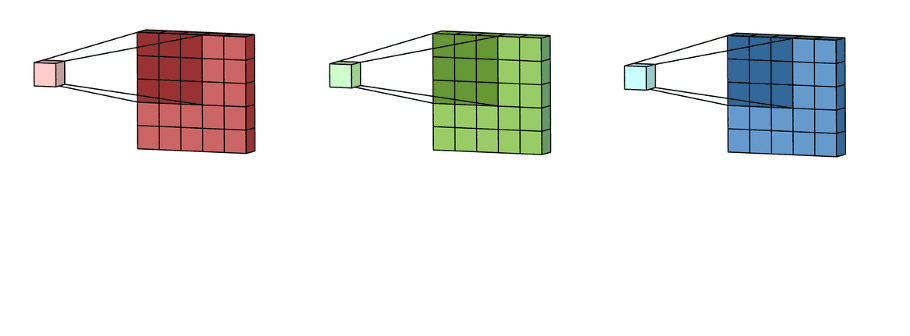

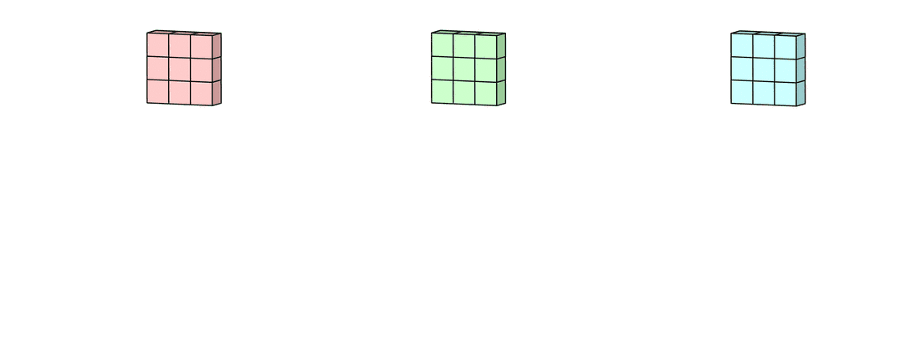

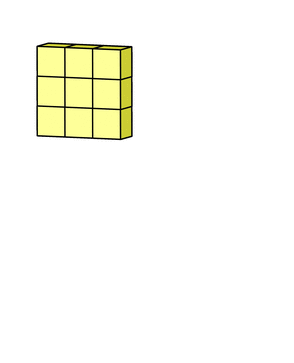

In [ ]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    """
    Here we will implement the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
    numpy array of shape (m, C_in, H_in, W_in)
    W -- Weights, numpy array of shape (C_out, C_in, f, f)
    b -- Biases, numpy array of shape (C_out, 1, 1, 1)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, C_out, H_out, W_out)
    """
    
    ### START YOUR CODE FROM HERE ###
    # Retrieve dimensions from A_prev's shape 
    (m, C_in, H_in, W_in) = 
    
    # Retrieve dimensions from W's shape (
    (C_out, C_in, f, f) = 
    
    # Retrieve information from "hparameters"
    stride = 
    pad = 
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    H_out = 
    W_out = 
    
    # Initialize the output volume Z with zeros.
    Z = 

    # Create A_prev_pad by padding A_prev
    A_prev_pad = 
    
    for i in range(m):                  # loop over the batch of training examples
        a_prev_pad =     # Select ith training example's padded activation
        for h in range(H_out):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = 
            vert_end = 
            
            for w in range(W_out):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice" 
                horiz_start = 
                horiz_end = 
                
                for c in range(C_out):   # loop over channels of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell).
                    a_slice_prev = 
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = 
                    biases  = 
                    Z[i, c, h, w] = conv_single_step(a_slice_prev, weights, biases)
                                        
    ### YOUR CODE ENDS HERE ###
    
    # checks whether your output shape is correct or not
    assert(Z.shape == (m, C_out, H_out, W_out))
    
    
    return Z

In [ ]:
torch.manual_seed(0)
x = torch.tensor([[[[0,0,1,1,2],[2,0,1,1,0],[2,1,1,0,2],[0,0,2,0,2],[0,2,0,2,2]],
                [[1,1,2,2,0],[0,1,1,1,1],[1,2,1,1,1],[1,1,0,0,2],[2,2,1,2,0]],
                [[1,0,1,1,1],[1,1,0,2,0],[2,0,2,0,2],[1,1,2,1,0],[1,1,2,2,0]]]])
print("x.shape =", x.shape)

W = torch.tensor([[[[0,-1,1],[1,0,1],[-1,1,1]],[[1,1,1],[-1,0,1],[1,1,1]],[[-1,-1,0],[1,1,0],[-1,1,-1]]],
                  [[[0,1,1],[0,1,1],[0,-1,-1]],[[1,0,0],[-1,1,0],[1,1,0]],[[1,0,1],[0,1,0],[1,0,1]]]])
b = torch.ones(2,1,1,1)
print("W.shape =", W.shape)
print("b.shape =", b.shape)

hparameters = {"pad" : 1,
               "stride": 2}

Z = conv_forward(x, W, b, hparameters)

In [ ]:
# sample test case 1
assert torch.isclose(torch.mean(Z), torch.tensor(6.2222))
print('Sample Test passed', '\U0001F44D')

In [ ]:
# sample test case 2
assert Z.shape == (1,2,3,3)
print('Sample Test passed', '\U0001F44D')

**Remark**: So what we did in the above method is that we took small pieces of the image to apply convolution over the image using filter and then iterated over the entire image to get the final output.

# **Pooling layer** (EVALUATIVE)

Like convolutions, pooling too helps us greatly in detecting features. The goal is to reduce the overall amount of information in an image, while maintaining the important features.

There are a number of different types of pooling, but for this assignment we'll implement MAX and AVERAGE pooling.

**MAX pooling** :
The idea here is to iterate over the image, select a neighbouring area of a certain pixel and perform the operation being shown in the diagram below. Take the largest (hence the name MAX pooling) of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

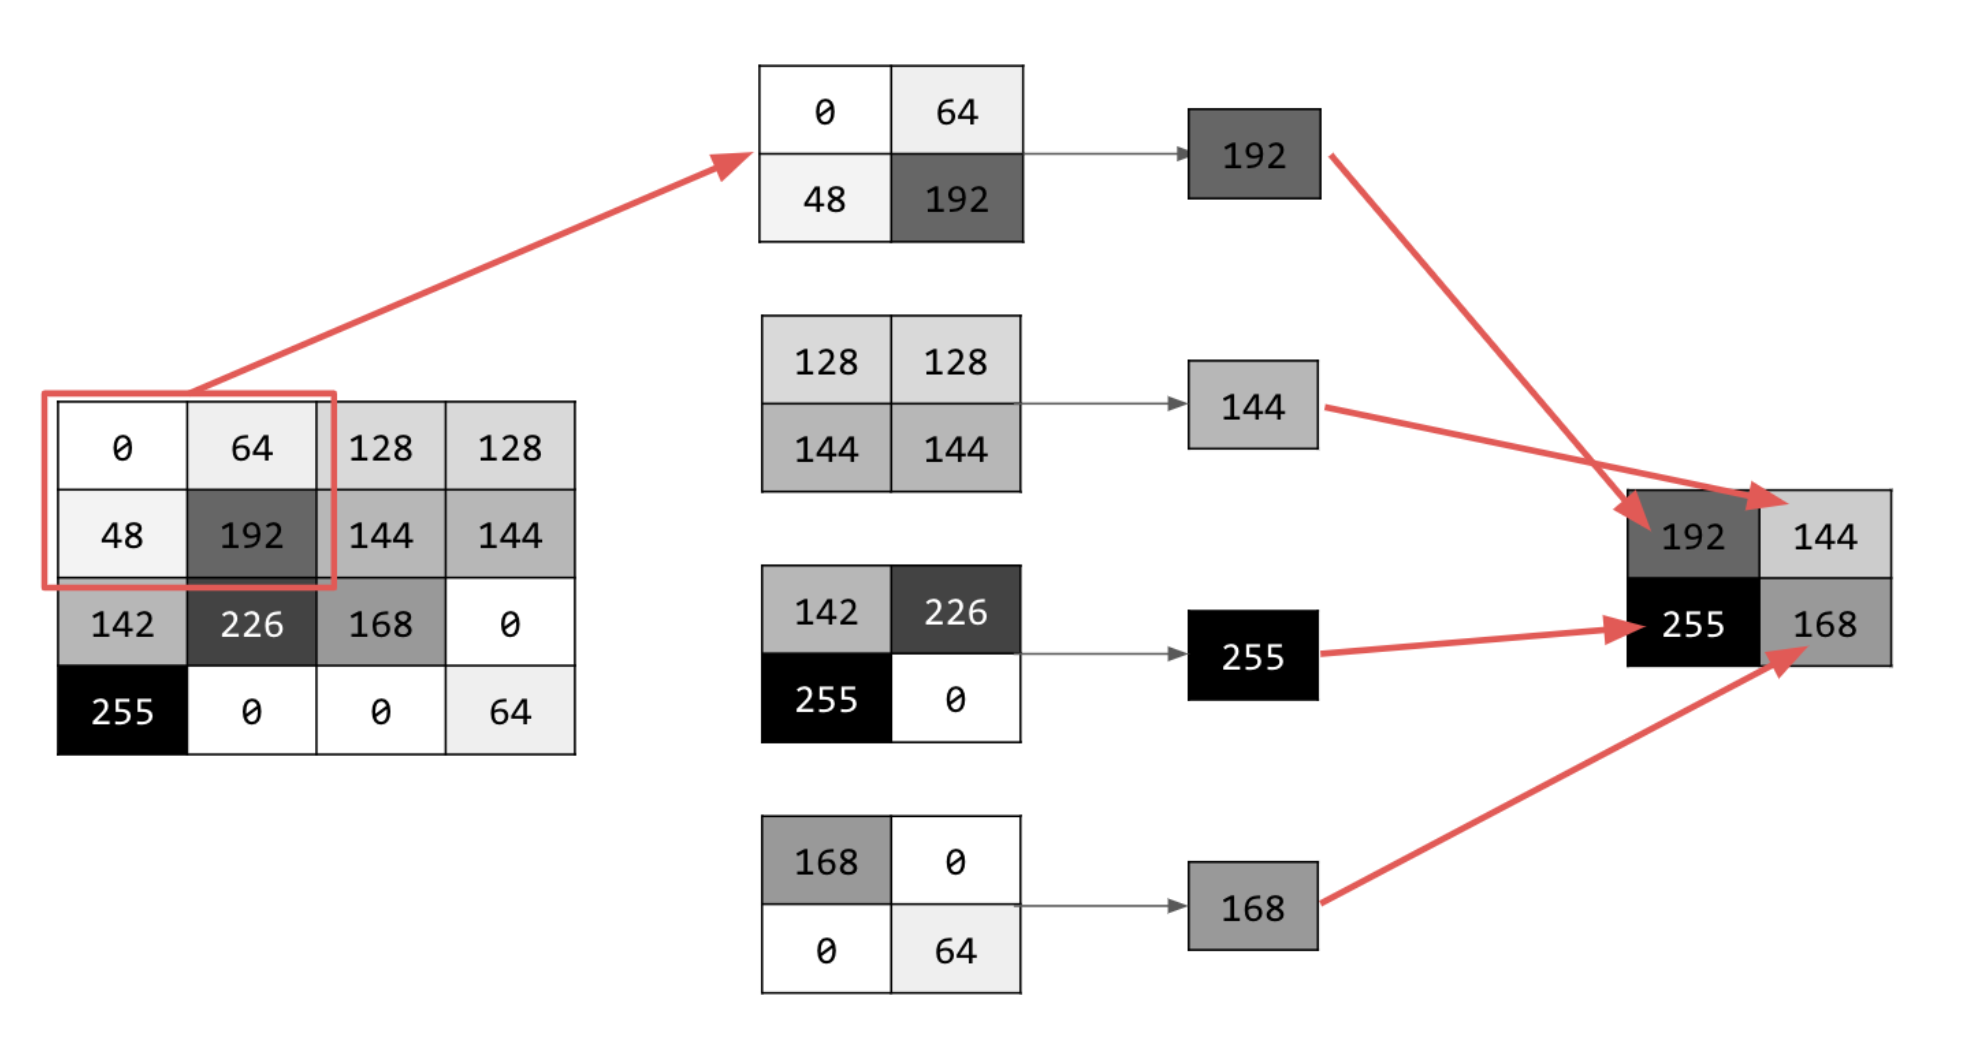

**AVERAGE pooling**: 
The idea behind average pooling is similar to max pooling. Here iterating over the image, average value for patches of a feature map is calculated. It adds a small amount of translation invariance - meaning translating the image by a small amount does not significantly affect the values of most pooled outputs. It extracts features more smoothly than Max Pooling, whereas max pooling extracts more pronounced features like edges.


<a href="https://ibb.co/CWQRN11"><img src="https://i.ibb.co/8X91TKK/Screenshot-2022-02-11-at-9-43-00-PM.png" alt="Screenshot-2022-02-11-at-9-43-00-PM" border="0" width="500" height="600"></a>

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Here we will implement the forward pass of the pooling layer
    
    Arguments passed to the function :
    A_prev -- Input tensor data of shape (m, n_C_prev, n_H_prev, n_W_prev)
    hparameters -- python dictionary containing "f" (filter size) and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- tensor output of the pool layer of shape (m, n_C_out, n_H_out, n_W_prev)
    """
    
    ### START YOUR CODE FROM HERE ###
    # Retrieve dimensions from the input shape
    (m,  C_in, H_in, W_in) = 
    
    # Retrieve hyperparameters from "hparameters"
    f = 
    stride = 
    
    # Define the dimensions of the output
    H_out = int(1 + (H_in - f) / stride)
    W_out = int(1 + (W_in - f) / stride)
    C_out = C_in
    
    # Initialize output matrix A
    A =              
    
    for i in range(m):                          # loop over the training examples
        for h in range(H_out):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice"
            

            
            for w in range(W_out):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice"
                

                
                for c in range (C_out):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c.
                    a_prev_slice = A_prev[i]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    if mode == "max":
                        A[i, c, h, w] = 
                    elif mode == "average":
                        A[i, c, h, w] = 
    ### YOUR CODE ENDS HERE ###
    
    
    # checks whether your output shape is correct or not
    assert(A.shape == (m, C_out, H_out, W_out))
    
    return A

In [ ]:
# Case 1: stride of 1
torch.manual_seed(0)
A_prev = torch.randn(2, 2, 4, 4)
hparameters = {"stride" : 1, "f": 2}
print("A_prev.shape = " + str(A_prev.shape))
# print("A_prev = \n", A_prev) #feel free to uncomment it and check 

In [ ]:
#sample test case 1
A= pool_forward(A_prev, hparameters, mode = "max")
# print("mode = max")
assert A.shape == (2,2,3,3)
# print("A = \n", A) #feel free to uncomment it and check
print('Sample Test passed', '\U0001F44D')

In [ ]:
#sample test case 2
A = pool_forward(A_prev, hparameters, mode = "average")
# print("mode = average")
assert torch.isclose(A[0][0][0][1], torch.tensor(-0.25673562))
# print("A = \n", A) #feel free to uncomment it and check
print('Sample Test passed', '\U0001F44D')

In [ ]:
# Case 2: stride of 2
# you can uncomment the print statements to see what's happening here
A_prev = torch.randn(2, 3, 5, 5)
hparameters = {"stride" : 2, "f": 3}

print("A_prev.shape = " + str(A_prev.shape))
# print("A_prev = \n", A_prev)
print()
A= pool_forward(A_prev, hparameters, mode = "max")
# print("mode = max")
print("A.shape = " + str(A.shape))
# print("A = \n", A)
print()
A = pool_forward(A_prev, hparameters, mode = "average")
# print("mode = average")
print("A.shape = " + str(A.shape))
# print("A = \n", A)

In [ ]:
# hidden test case 1

In [ ]:
# hidden test case 2

***Finally, we have reached to the end of Part1 of Assignment 2. Hope you guys enjoyed solving this assignment.*** 


<img src="
https://hackernoon.com/hn-images/1*GKfUxrScFWd0QyTsddEgWg.png" alt="Screenshot-2022-02-24-at-11-24-06-PM" width=50% border="0"></a><br /><a target='_blank' href='https://500pxdownload.com/'>




Assignment by: 

Sarthak Gupta (f20190464@pilani.bits-pilani.ac.in) and Achleshwar Luthra (f20180401@pilani.bits-pilani.ac.in)
